In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [28]:
original_image_path = 'Images/Image_bbox3.tif'
mask_image_path = 'mask_graves2.tif'

In [29]:
original_image = imread(original_image_path)
mask_image = imread(mask_image_path)

In [30]:
print("Original image shape:", original_image.shape)
print("Mask image shape:", mask_image.shape)

Original image shape: (1122, 746, 3)
Mask image shape: (1122, 746)


In [31]:
original_image = np.expand_dims(original_image, axis=0) 
mask_image = np.expand_dims(mask_image, axis=0)

original_image = original_image.astype(np.float32)
mask_image = mask_image.astype(np.float32)

original_image /= 255.0

In [32]:
mask_image = (mask_image > 127).astype(np.float32)

In [33]:
print("Original image shape:", original_image.shape)
print("Mask image shape:", mask_image.shape)

Original image shape: (1, 1122, 746, 3)
Mask image shape: (1, 1122, 746)


In [34]:
X_train = np.expand_dims(original_image, axis=0)
y_train = np.expand_dims(mask_image, axis=0)

X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

X_train /= 255.0

input_shape = original_image.shape[1:]

In [45]:
from tensorflow.keras.layers import ZeroPadding2D

# Adjust the upsampling layers and add ZeroPadding2D
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_shape),
    MaxPooling2D((2, 2)),  # No padding here
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),  # No padding here
    Conv2DTranspose(32, (2, 2), strides=(2, 2), activation='relu', padding='same'),  # Changed kernel size to (2, 2)
    Conv2DTranspose(16, (2, 2), strides=(2, 2), activation='relu', padding='same'),  # Adjusted kernel size and filters
    ZeroPadding2D(padding=((1, 1), (1, 1))),  # Add padding to match the original dimensions
    Conv2D(1, (1, 1), activation='sigmoid', padding='same')
])


In [46]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 1122, 746, 16)     448       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 561, 373, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 561, 373, 32)      4640      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 280, 186, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_transpose_14 (Conv2  (None, 560, 372, 32)      4128      
 DTranspose)                                                     
                                                      

In [48]:
history = model.fit(original_image, mask_image, epochs=10, batch_size=1)

Epoch 1/10


1/1 [==============================] - 3s 3s/step - loss: 0.6922 - accuracy: 0.6264
Epoch 2/10
1/1 [==============================] - 0s 443ms/step - loss: 0.6885 - accuracy: 0.8289
Epoch 3/10
1/1 [==============================] - 0s 392ms/step - loss: 0.6848 - accuracy: 0.8847
Epoch 4/10
1/1 [==============================] - 0s 422ms/step - loss: 0.6810 - accuracy: 0.9311
Epoch 5/10
1/1 [==============================] - 0s 340ms/step - loss: 0.6769 - accuracy: 0.9464
Epoch 6/10
1/1 [==============================] - 0s 396ms/step - loss: 0.6725 - accuracy: 0.9482
Epoch 7/10
1/1 [==============================] - 0s 313ms/step - loss: 0.6676 - accuracy: 0.9487
Epoch 8/10
1/1 [==============================] - 0s 378ms/step - loss: 0.6623 - accuracy: 0.9487
Epoch 9/10
1/1 [==============================] - 0s 325ms/step - loss: 0.6565 - accuracy: 0.9487
Epoch 10/10
1/1 [==============================] - 0s 401ms/step - loss: 0.6502 - accuracy: 0.9487


In [50]:
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f'Test accuracy: {accuracy:.3f}')

In [52]:
#predictions = model.predict(X_test)

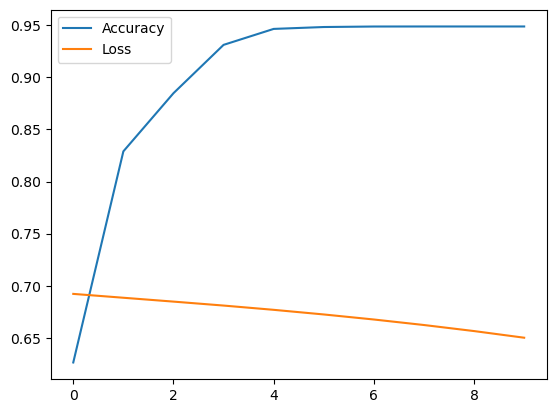

In [51]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.legend()
plt.show()

In [53]:
predicted_mask = model.predict(original_image)

1/1 [==============================] - 0s 301ms/step


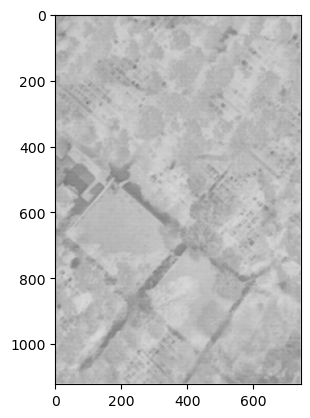

In [56]:
plt.imshow(predicted_mask[0, :, :, 0], cmap='gray')
plt.show()

In [57]:
from sklearn.metrics import jaccard_score

thresholded_pred_mask = (predicted_mask[0, :, :, 0] > 0.5).astype(np.uint8)

ground_truth_mask_flat = mask_image.flatten()
thresholded_pred_mask_flat = thresholded_pred_mask.flatten()

iou = jaccard_score(ground_truth_mask_flat, thresholded_pred_mask_flat)

print('IoU (Jaccard index):', iou)

IoU (Jaccard index): 0.0
